DEVELOPED BY : AVITAY GELTMAN

sklearn version: 1.2.0
xgboost version: 0.90
torch version: 1.10.1+cpu

In [690]:
import xgboost as xgb
import sklearn
import torch

print("Scikit-learn version: ", sklearn.__version__)
print("XGBoost version: ", xgb.__version__)
print("Torch version: ", torch.__version__)

Scikit-learn version:  1.2.0
XGBoost version:  0.90
Torch version:  1.10.1+cpu


In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchmetrics
from colorama import Fore
from colorama import Style
import warnings
import time

In [303]:
# unmark the desired pollutant (NO2/PM2.5)
pollutant = 'NO2'
# pollutant = 'PM2.5'

# to load the data, make sure the path for the .csv file is correct
if pollutant == 'NO2':
    data = pd.DataFrame(pd.read_csv("NO2COmpletTbl.csv", parse_dates=True)) # reading data to pandas dataframe
else: #PM2.5
    data = pd.DataFrame(pd.read_csv("PM25CompletTbl.csv", parse_dates=True)) # reading data to pandas dataframe

data

,time,hour,station,region,type,X,Y,long,lat,HASL,...,ZH,modCO,modNO,modNO2,modO3,modPM10,modPM25,modSO2,NO2,Err
0,01-Jan-2018 06:00:01,6,EILAT_IEC,EIL,Gener,194714,385170,34.949213,29.554107,49.0,...,40.010006,134.363251,0.069079,0.406160,43.204922,9.717587,4.607586,0.217570,6.9,6.493840
1,01-Jan-2018 06:00:01,6,GOLDWATER,EIL,Gener,194714,385170,34.949213,29.554107,49.0,...,40.010006,134.363251,0.069079,0.406160,43.204922,9.717587,4.607586,0.217570,6.9,6.493840
2,01-Jan-2018 06:00:01,6,YERUHAM,NGV,Gener,193051,544467,34.928056,30.991001,486.0,...,39.572067,145.912949,0.366279,1.983642,38.630047,9.702694,5.669499,1.268337,4.3,2.316358
3,01-Jan-2018 06:00:01,6,NEGEV_JUNCTION,NGV,Gener,183567,551454,34.828516,31.053768,382.0,...,39.788353,148.871063,0.036141,0.778355,38.563164,10.352297,5.708193,0.745236,3.7,2.921645
4,01-Jan-2018 06:00:01,6,RAMAT_HOVAV_SOUTH,NGV,NaN,180247,559163,34.793436,31.123191,331.0,...,39.851860,150.837677,0.299864,1.928364,36.792328,11.010432,6.628351,4.130837,2.4,0.471636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39143,23-Dec-2020 13:00:01,13,IRONID,GUD,Trans,180414,666788,34.790918,32.093806,12.0,...,40.060757,142.744675,3.144137,19.214502,24.201452,7.450971,5.922740,3.608224,14.8,-4.414502
39144,23-Dec-2020 13:00:01,13,EHAD_HAAM,GUD,Trans,187998,667486,34.871234,32.100337,28.0,...,40.240028,139.635483,1.977291,12.908053,26.793800,7.404082,6.374056,1.958934,25.5,12.591947
39145,23-Dec-2020 13:00:01,13,ARIEL,SHM,Gener,216136,667823,35.169332,32.103810,546.0,...,39.514626,121.745392,0.305540,2.528420,37.275600,2.038297,1.546840,0.403958,6.4,3.871580
39146,23-Dec-2020 13:00:01,13,YAD_AVNER,GUD,Gener,181757,669624,34.805033,32.119426,39.0,...,39.958965,146.506393,4.201608,22.097006,20.609669,7.887576,6.340599,4.807429,4.9,-17.197006


In [304]:
data_for_corr = data.drop(['time', 'station', 'region', 'type'], axis=1) # dropping columns that are not to be used
if data_for_corr.isnull().values.any(): # checking for missing values
    print(Fore.RED + "There are missing values in the dataset")
else:
    print(Fore.GREEN + "There are no missing values in the dataset")

There are no missing values in the dataset


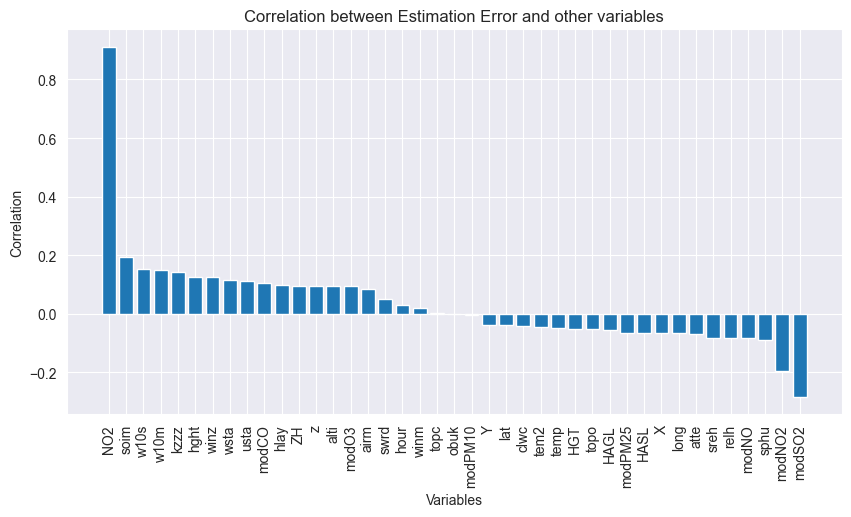

,variable,correlation (absolute),negative,positive
0,NO2,0.911383,NaN,0.911383
1,modSO2,0.283561,-0.283561,NaN
2,modNO2,0.196556,-0.196556,NaN
3,soim,0.193011,NaN,0.193011
4,w10s,0.151239,NaN,0.151239
5,w10m,0.151210,NaN,0.151210
6,kzzz,0.142955,NaN,0.142955
7,hght,0.125088,NaN,0.125088
8,winz,0.123950,NaN,0.123950
9,wsta,0.115323,NaN,0.115323


In [514]:
corr = data_for_corr.corr().loc['Err'].sort_values(ascending=False)[1:] # saving correlation only of "Err" with all variables except itself in a table in descending order

corr = corr.rename_axis('variable').reset_index(name='correlation') # first column "variable" and "correlation" second column
corr_absolute = corr.copy() # copying the table to a new table which will rank the correlation in absolute values
corr_absolute['negative'] = corr_absolute['correlation'].apply(lambda x: x if x < 0 else np.nan) # a column for features with negative correlation
corr_absolute['positive'] = corr_absolute['correlation'].apply(lambda x: x if x > 0 else np.nan) # a column for features with positive correlation
corr_absolute["correlation (absolute)"] = corr_absolute["correlation"].abs() # a column for absolute values of correlation
corr_absolute = corr_absolute.sort_values('correlation (absolute)', ascending=False) # sorting by the absolute correlation values, in descending order
corr_absolute = corr_absolute.reset_index(drop=True) # resetting index

# plotting the correlation table
plt.figure(figsize=(10, 5))
plt.bar(corr["variable"], corr["correlation"])
plt.title("Correlation between Estimation Error and other variables")
plt.xticks(rotation=90)
plt.xlabel("Variables")
plt.ylabel("Correlation")
plt.show()

corr_absolute[["variable", "correlation (absolute)", "negative", "positive"]] # displaying the correlation table

In [558]:
correlation_fs_names = list(corr_absolute["variable"][1:11]) # saving the names of the top 10 features with highest absolute correlation (Excluding NO2 measurements)

In [306]:
y = data['Err'] # target variable
X = data.drop(['time', 'station', 'region', 'type', 'Err'], axis=1) # features

# 2. Elastic Net Feature Selection

In [515]:
from sklearn.linear_model import ElasticNet # for more information, see https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
if pollutant == 'NO2':
    X_scaled = scaler.fit_transform(X.drop(['NO2'], axis=1, inplace=False)) # standardizing the features, and dropping NO2 measurements
    X_scaled = pd.DataFrame(X_scaled, columns=X.drop(['NO2'], axis=1, inplace=False).columns) # allocating the standardized features the original names
    sfm = SelectFromModel(ElasticNet(alpha=0.2, l1_ratio=0.5, random_state=0)) # creating the model instance. These hyperparameters are chosen after several trials, it ends up with 10 features (excluding actual measurements)
else: #PM2.5
    X_scaled = scaler.fit_transform(X.drop(['PM25'], axis=1, inplace=False))
    X_scaled = pd.DataFrame(X_scaled, columns=X.drop(['PM25'], axis=1, inplace=False).columns)
    sfm = SelectFromModel(ElasticNet(alpha=0.3, l1_ratio=0.5, random_state=0))

sfm.fit(X_scaled, y) # fitting the model
feature_idx = sfm.get_support()
feature_name = X_scaled.columns[feature_idx]  # saving the names of the selected features
feature_coefficient = sfm.estimator_.coef_[feature_idx] # saving the coefficients of the selected features
feature_importance = pd.DataFrame(list(zip(feature_name, feature_coefficient)), columns=['feature', 'coefficient']) # creating a dataframe of the selected features and their coefficients
feature_importance['negative'] = feature_importance['coefficient'].apply(lambda x: x if x < 0 else np.nan) # a column for features with negative coefficients
feature_importance['positive'] = feature_importance['coefficient'].apply(lambda x: x if x > 0 else np.nan) # a column for features with positive coefficients
feature_importance["coefficient (absolute)"] = feature_importance["coefficient"].abs() # a column for absolute values of coefficients
feature_importance = feature_importance.sort_values('coefficient (absolute)', ascending=False) # sorting by the absolute correlation values, in descending order
feature_importance = feature_importance.reset_index(drop=True) # resetting index

elastic_fs_names = feature_importance['feature'].tolist() # saving the names of the selected features

In [308]:
feature_importance

,feature,coefficient,negative,positive,coefficient (absolute)
0,modSO2,-2.284999,-2.284999,NaN,2.284999
1,soim,1.752239,NaN,1.752239,1.752239
2,modNO2,-1.353569,-1.353569,NaN,1.353569
3,modCO,1.237850,NaN,1.237850,1.237850
4,HASL,-0.789783,-0.789783,NaN,0.789783
5,hour,-0.687519,-0.687519,NaN,0.687519
6,HAGL,-0.644111,-0.644111,NaN,0.644111
7,kzzz,0.616078,NaN,0.616078,0.616078
8,wsta,0.506825,NaN,0.506825,0.506825
9,airm,-0.399635,-0.399635,NaN,0.399635


In [703]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10) # split the data into train and test sets

if pollutant == 'NO2':
    test_pollutant = X_test["NO2"] # for later prediction use
    X_train = X_train.drop(['NO2'], axis=1) # dropping measurements because it can't be part of the prediction task
    X_test = X_test.drop(['NO2'], axis=1)
else:
    test_pollutant = X_test["PM25"]
    X_train = X_train.drop(['PM25'], axis=1)
    X_test = X_test.drop(['PM25'], axis=1)

X_names = X_train.columns # saving the names of the features

X_test_unscaled = X_test.copy()
X_train = scaler.fit_transform(X_train) # standardizing the train set, per feature
X_test = scaler.fit_transform(X_test) # standardizing the test set, per feature
X_train_copy = pd.DataFrame(X_train) # scaled
X_test_copy = pd.DataFrame(X_test) # scaled

# assign X_train_copy columns the names of X_names
X_train_copy.columns = X_names
X_test_copy.columns = X_names

# converting y_train and y_test to numpy arrays
y_test_index = y_test.index # saving the indices of y_test
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# printing the shapes of the train and test sets
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (29361, 40)
X_test shape:  (9787, 40)
y_train shape:  (29361,)
y_test shape:  (9787,)


In [107]:
# # Implementing grid search on random forest, to find the best hyperparameters
#
# import datetime
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
#
# # defining the parameter values that should be searched
# param_grid = {'max_depth': ['None', 50, 100],
#               'max_features': ['auto', 'sqrt', 0.2, 0.4, 0.5, 0.6, 0.8],
#               'n_estimators': [150, 200, 250],
#               'min_samples_split': [2, 5, 10],
#               'min_samples_leaf': [1, 2, 4],
#               'criterion': ['squared_error'],} # grid search will try all possible combinations of these values
#
# # instantiating the grid
# grid = GridSearchCV(RandomForestRegressor(), param_grid, refit=True, cv=4) # 4-fold cross validation
#
# print(Fore.CYAN + "Started at: ", datetime.datetime.now()) # printing the time the grid search started
#
# grid.fit(X_train, y_train) # fitting the grid
#
# pd.DataFrame(grid.cv_results_).sort_values("rank_test_score").to_csv("NO2_RF_grid_search_results.csv") # saving the results of the grid search
# Although the first result is allegedly the best, it is not necessarily the case, because other metrics are not taken into account.
#
# print(Fore.CYAN + "Ended at: ", datetime.datetime.now()) # printing the time the grid search ended

In [704]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

if pollutant == 'NO2':
    rf = RandomForestRegressor(max_depth = 50, max_features = 1.0, min_samples_leaf = 4, min_samples_split = 2, n_estimators = 150, random_state = 0)
else: # pollutant == 'PM2.5'
    rf = RandomForestRegressor(max_depth = 50, max_features = 'sqrt', min_samples_split = 5, n_estimators = 150, random_state = 0)

rf.fit(X_train, y_train) # fitting the model

RandomForestRegressor(max_depth=50, min_samples_leaf=4, n_estimators=150,
                      random_state=0)

In [ ]:
# # Implementing grid search on xgboost, to find the best hyperparameters
# from xgboost import XGBRegressor
# from sklearn.model_selection import GridSearchCV
# import datetime
#
# # define the parameter values that should be searched
# param_grid = {'max_depth': [6, 8, 10],
#               'eta': [0.0, 0.1, 0.2, 0.3],
#               'subsample': [0.5, 0.7],
#               'colsample_bytree': [1, 0.75],
#               'gamma': [0, 5, 10],
#               'reg_alpha': [0, 0.5],
#               'reg_lambda': [1, 2, 3],
#               'n_estimators': [100, 150, 200]},
#               'num_parallel_tree': [1, 2, 3],
#               'booster': ['gbtree', 'dart']}
#
# # instantiate the grid
# grid = GridSearchCV(XGBRegressor(), param_grid, refit=True, cv=3)
#
# print(Fore.CYAN + "Started at: ", datetime.datetime.now()) # printing the time the grid search started
#
# # fit the grid with data
# grid.fit(X_train, y_train)
#
# # rank them by score and then save a csv file with the results of the grid search
# pd.DataFrame(grid.cv_results_).sort_values("rank_test_score").to_csv("NO2_XGB_grid_search_results.csv")
# # Although the first result is allegedly the best, it is not necessarily the case, because other metrics are not taken into account.
#
# print(Fore.CYAN + "Ended at: ", datetime.datetime.now()) # printing the time the grid search ended

In [705]:
# XGBoost
from xgboost import XGBRegressor

if pollutant == 'NO2':
    xgb = XGBRegressor(booster = 'dart', eta = 0.0, gamma = 5, max_depth = 8, min_child_weight = 2, num_parallel_tree = 3, reg_lambda = 1, reg_alpha = 0, subsample = 0.7, colsample_bytree = 1, n_estimators = 100, random_state = 0)
else: # pollutant == 'PM2.5'
    xgb = XGBRegressor(booster = 'dart', gamma = 0, max_depth = 8, min_child_weight = 1, num_parallel_tree = 1, reg_lambda = 1, reg_alpha = 0.5, subsample = 1.0, colsample_bytree = 0.75, n_estimators = 200, random_state = 0)


xgb.fit(X_train, y_train) # fitting the model

XGBRegressor(booster='dart', eta=0.0, gamma=5, max_depth=8, min_child_weight=2,
             num_parallel_tree=3, subsample=0.7)

In [458]:
print(xgb.get_params()) # printing the parameters used for the xgb model
# n_estimators is 100 by default

{'base_score': 0.5, 'booster': 'dart', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 5, 'importance_type': 'gain', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 8, 'min_child_weight': 2, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 0.7, 'verbosity': 1, 'eta': 0.0, 'num_parallel_tree': 3}


In [517]:
xgb_gain_score = xgb.get_booster().get_score(importance_type='total_gain') # extracting the feature importance scores
xgb_gain_sum = sum(xgb_gain_score.values()) # summing the total_gain values of all features
gain_normalized = {key: value / xgb_gain_sum for key, value in xgb_gain_score.items()} # calculating the relative gain of each feature
sorted_gain = dict(sorted(gain_normalized.items(), key=lambda x: x[1], reverse=True)) # sorting the relative gain scores

k = 10
selected_indices = [int(key[1:]) for key in list(sorted_gain.keys())[:k]] # extracting the indices of the k top features
selected_features_names = X_test_copy.columns[selected_indices] # extracting the names of the k top features

# extract the values from sorted_importance
sorted_gain_numpy = np.array(list(sorted_gain.values())) # transforming the values of the dictionary into a numpy array

feature_importance = pd.DataFrame({'Feature Name': X_test_unscaled.columns[selected_indices], 'Portion of MSE Reduction': sorted_gain_numpy[:10], 'Feature': selected_indices})
xgb_fs_names = feature_importance['Feature Name'].tolist() # extracting the names of the k top features
feature_importance

,Feature Name,Portion of MSE Reduction,Feature
0,HASL,0.177508,5
1,soim,0.162491,17
2,hour,0.076172,0
3,modSO2,0.074377,39
4,modNO2,0.066994,35
5,Y,0.038099,2
6,modNO,0.036498,34
7,modCO,0.030346,33
8,winz,0.025121,29
9,X,0.024318,1


PERMUTATION IMPORTANCE:

In [471]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(xgb, X_test, y_test, n_repeats=10, random_state=0) # calculating the permutation importance scores

In [488]:
sorted_idx = perm_importance.importances_mean.argsort()
xgb_permutation_importance = pd.DataFrame({'Feature Name': X_names[sorted_idx], 'Permutation Importance': perm_importance.importances_mean[sorted_idx]}).sort_values(by = 'Permutation Importance', ascending = False).head(10)
# save the top 10 feature names to a list
xgb_permutation_names = xgb_permutation_importance['Feature Name'].tolist()
xgb_permutation_importance

,Feature Name,Permutation Importance
39,HASL,0.259950
38,soim,0.239658
37,modNO2,0.169318
36,hour,0.069247
35,modNO,0.066592
34,modSO2,0.044400
33,Y,0.039737
32,HAGL,0.034625
31,winz,0.026904
30,modCO,0.026219


NEURAL NETWORK:

In [718]:
# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.tensorboard import SummaryWriter # Used to log the training and test loss

In [706]:
# converting the train and test sets to tensors if they are numpy arrays
def numpy_to_tensor(x):
    if type(x) == np.ndarray:
        return torch.from_numpy(x).float()
    return x

X_train, X_test, y_train, y_test = numpy_to_tensor(X_train), numpy_to_tensor(X_test), \
                                   numpy_to_tensor(y_train), numpy_to_tensor(y_test)

# creating a TensorDataset with train and test sets
train = TensorDataset(X_train, y_train)
test = TensorDataset(X_test, y_test)

# creating a DataLoader with train and test sets
batch_size = 64
train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=True)

# printing a batch sample from train_loader
dataiter = iter(train_loader)
samples, targets = dataiter.next()
targets = targets.view(targets.shape[0], 1)
print(samples.shape)
print(targets.shape)

torch.Size([64, 40])
torch.Size([64, 1])


In [ ]:
# connect to Jupyter GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

In [547]:
def train_regular_NN(net, train_loader, test_loader, criterion, optimizer, num_epochs, writer):
    test_loss_min = np.Inf # to later on track change in test loss
    count_no_improvement = 0 # to later on track the number of epochs with no improvement in test loss
    min_loss_epoch = 0 # to later on track the epoch with the minimum test loss

    start_time = time.time() # used to track the time it takes to train the model

    for epoch in range(num_epochs):
        running_loss = 0 # initializing the running loss
        for samples, targets in train_loader:
            samples, targets = samples.to(device), targets.to(device) # sending the data to the device (GPU if available)
            targets = targets.view(targets.shape[0], 1) # reshaping targets to (batch_size, 1)
            optimizer.zero_grad() # clear the gradients, because gradients are accumulated
            output = net(samples) # forward pass
            loss = criterion(output, targets) # calculating the loss
            loss.backward() # backward pass, calculating the gradients
            optimizer.step() # updating the weights
            running_loss += loss.item() # adding the loss of the current batch to the running loss

        should_stop, test_loss_min, min_loss_epoch, count_no_improvement = evaluation(
            net, criterion, train_loader, test_loader, writer, epoch, num_epochs,
            running_loss, test_loss_min, min_loss_epoch, count_no_improvement, 'regular_net.pt') # evaluating the model on train and test sets
        if should_stop: # if the test loss did not improve for 40 epochs, stop training
            break

    end_time = time.time()
    print(Fore.MAGENTA + "Time to train the model: ", end_time - start_time, "seconds")

    return net, test_loss_min, min_loss_epoch

# _______________________________________________________________________________________________________________

def evaluation(net, criterion, train_loader, test_loader, writer, epoch, num_epochs, running_loss, test_loss_min, min_loss_epoch, count_no_improvement, model_name):
    print(Fore.CYAN + "Epoch: {}/{}.. ".format(epoch+1, num_epochs),
          "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader))) # printing the training loss for the current epoch
    writer.add_scalar('Training loss', running_loss/len(train_loader), epoch) # writing the training loss to tensorboard

    test_loss = 0 # initializing the test loss
    with torch.no_grad(): # we do not need to calculate the gradients, because we are not training
        net.eval() # putting the model in evaluation mode
        for samples, targets in test_loader:
            samples, targets = samples.to(device), targets.to(device)
            targets = targets.view(targets.shape[0], 1)
            output = net(samples)
            test_loss += criterion(output, targets) # calculating the test loss

    print(Fore.LIGHTYELLOW_EX + "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader))) # printing the test loss for the current epoch
    writer.add_scalar('Test loss', test_loss/len(test_loader), epoch) # writing the test loss to tensorboard

    if test_loss/len(test_loader) < test_loss_min: # if the test loss improved, save the model
        print(Fore.GREEN + "Test loss decreased ({:.6f} --> {:.6f}).  Saving model ...".format(test_loss_min, test_loss/len(test_loader)))
        test_loss_min = test_loss/len(test_loader) # updating the minimum test loss
        min_loss_epoch = epoch # updating the epoch with the minimum test loss
        torch.save(net.state_dict(), model_name) # saving the model
        count_no_improvement = 0 # resetting the number of epochs with no improvement in test loss
    else:
        count_no_improvement += 1 # if the test loss did not improve, increment the counter

        if count_no_improvement == 40: # if the test loss did not improve for 40 epochs, stop training
            print(Fore.RED + "Test loss did not decrease for 40 epochs. Stopping training. Loading model with lowest test loss.")
            return True, test_loss_min, min_loss_epoch, count_no_improvement

    net.train() # putting the model back in training mode
    return False, test_loss_min, min_loss_epoch, count_no_improvement

In [548]:
def train_elastic_net_NN(net, reg_parameter, alpha, train_loader, test_loader, criterion, optimizer, num_epochs, writer):
    test_loss_min = np.Inf
    count_no_improvement = 0
    min_loss_epoch = 0

    start_time = time.time()

    for epoch in range(num_epochs):
        running_loss = 0
        for samples, targets in train_loader:
            samples, targets = samples.to(device), targets.to(device)
            targets = targets.view(targets.shape[0], 1)
            optimizer.zero_grad()
            output = reg_net(samples)
            main_loss = criterion(output, targets) # calculating the main loss
            l1_loss = alpha * torch.abs(reg_net.fc1.weight) # calculating the L1 loss for the weights
            l2_loss = (1 - alpha) * reg_net.fc1.weight ** 2 # calculating the L2 loss for the weights
            elastic_net_loss = l1_loss + l2_loss # the elastic net loss
            loss = (1 - reg_parameter) * main_loss + reg_parameter * elastic_net_loss.sum() # the total loss, combining the main loss and the elastic net loss
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        should_stop, test_loss_min, min_loss_epoch, count_no_improvement = evaluation(
            net, criterion, train_loader, test_loader, writer, epoch, num_epochs,
            running_loss, test_loss_min, min_loss_epoch, count_no_improvement, 'elastic_net.pt')
        if should_stop:
            break

    end_time = time.time()
    print(Fore.MAGENTA + "Time to train the model: ", end_time - start_time, "seconds")

    return net, test_loss_min, min_loss_epoch

# _______________________________________________________________________________________________________________

def train_gradient_feature_selection_NN(net, n_top_features, train_loader, test_loader, criterion, optimizer, num_epochs, writer):
    test_loss_min = np.Inf
    count_no_improvement = 0
    min_loss_epoch = 0

    start_time = time.time()
    for epoch in range(num_epochs):
        running_loss = 0
        for samples, targets in train_loader:
            samples, targets = samples.to(device), targets.to(device)
            targets = targets.view(targets.shape[0], 1)
            optimizer.zero_grad()
            output = net(samples)
            loss = criterion(output, targets)
            loss.backward()

            gradients = torch.sum(net.fc1.weight.grad.abs(), dim=0) # summing the absolute value of the gradients for each feature across all neurons in the first layer
            _, top_n_features = torch.topk(gradients, k = n_top_features) # getting the indices of the top k features (the ones with the highest sum of the absolute value of the gradients)
            non_top_features = np.delete(np.arange(0, input_dim), top_n_features) # indices of the features that are outside the top k features
            net.fc1.weight.grad[:, non_top_features] = 0 # zeroing out the gradients for the non-top features

            optimizer.step()
            running_loss += loss.item()

        should_stop, test_loss_min, min_loss_epoch, count_no_improvement = evaluation(
            net, criterion, train_loader, test_loader, writer, epoch, num_epochs,
            running_loss, test_loss_min, min_loss_epoch, count_no_improvement, 'gradient_net.pt')
        if should_stop:
            break

    end_time = time.time()
    print(Fore.MAGENTA + "Time to train the model: ", end_time - start_time, "seconds")

    return net, test_loss_min, min_loss_epoch

In [644]:
input_dim = X_train.shape[1] # number of features
hidden_dim = 200
num_epochs = 200

In [20]:
class Net(nn.Module): # defining the neural network architecture
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

net = Net().to(device) # creating an instance of neural network
print(Fore.CYAN + "", net) # printing the neural network architecture

criterion = nn.MSELoss() # mean squared error loss function
optimizer = optim.Adam(net.parameters(), lr=0.001) # Adam optimizer

writer = SummaryWriter()

# Train the regular neural network
net, test_loss_min, min_loss_epoch = train_regular_NN(net, train_loader, test_loader, criterion, optimizer, num_epochs, writer)

# load the model with the lowest validation loss
print(Fore.GREEN + "Lowest Test loss achieved: {:.6f}".format(test_loss_min))
print(Fore.GREEN + "At Epoch #{}".format(min_loss_epoch), "\n")
net.load_state_dict(torch.load('regular_net.pt'))

 Net(
  (fc1): Linear(in_features=40, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=200, bias=True)
  (fc4): Linear(in_features=200, out_features=1, bias=True)
)
Epoch: 1/200..  Training Loss: 98.288.. 
Test Loss: 103.356.. 
Test loss decreased (inf --> 103.355659).  Saving model ...
Epoch: 2/200..  Training Loss: 85.749.. 
Test Loss: 99.914.. 
Test loss decreased (103.355659 --> 99.913559).  Saving model ...
Epoch: 3/200..  Training Loss: 82.769.. 
Test Loss: 102.054.. 
Epoch: 4/200..  Training Loss: 80.257.. 
Test Loss: 98.215.. 
Test loss decreased (99.913559 --> 98.214912).  Saving model ...
Epoch: 5/200..  Training Loss: 78.123.. 
Test Loss: 94.402.. 
Test loss decreased (98.214912 --> 94.401917).  Saving model ...
Epoch: 6/200..  Training Loss: 77.309.. 
Test Loss: 96.329.. 
Epoch: 7/200..  Training Loss: 75.584.. 
Test Loss: 94.682.. 
Epoch: 8/200..  Training Loss: 74.473.. 
Test Loss: 95.

<All keys matched successfully>

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=runs

ELASTIC NET REGULARIZED NEURAL NETWORK FOR FEATURE SELECTION:

In [719]:
# definining the Elastic-Net Regularized Neural Network architecture
class RegularizedNet(nn.Module):
    def __init__(self):
        super(RegularizedNet, self).__init__()
        # input layer matching the number of features in X_train
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, 1)
        self.L1_loss = nn.L1Loss(size_average=False)
        self.L2_loss = nn.MSELoss(size_average=False)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

WEIGHTS-BASED FEATURE SELECTION (Standard NN, Elastic-Net Regularized NN, Gradient Modified NN):

In [549]:
initial_t = time.time()
reg_parameter = 0.2 # regularization parameter for the Elastic-Net Regularized NN
alpha = 0.5 # elastic net mixing parameter (L1 = 0.5, L2 = 0.5)
n_top_features = 10 # for the Gradient-Net Feature Selection
num_runs = 5
# Tensors to store the average weight magnitudes from each run
average_weight_abs_magnitudes = torch.zeros((input_dim, num_runs))
reg_average_weight_abs_magnitudes = torch.zeros((input_dim, num_runs))
grad_average_weight_abs_magnitudes = torch.zeros((input_dim, num_runs))

print(Fore.CYAN + "", Net()) # printing the neural network architecture (which is the same for the gradient net)
print(Fore.CYAN + "", RegularizedNet()) # printing the regularized neural network architecture
for run in range(num_runs):
    net, grad_net = Net().to(device), Net().to(device)
    reg_net = RegularizedNet().to(device)

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)
    reg_optimizer = optim.Adam(reg_net.parameters(), lr=0.001)
    grad_optimizer = optim.Adam(grad_net.parameters(), lr=0.001)

    writer = SummaryWriter()
    reg_writer = SummaryWriter()
    grad_writer = SummaryWriter()

    # Train the regular neural network
    net, test_loss_min, min_loss_epoch = train_regular_NN(net, train_loader, test_loader, criterion, optimizer, num_epochs, writer)
    reg_net, reg_test_loss_min, reg_min_loss_epoch = train_elastic_net_NN(reg_net, reg_parameter, alpha, train_loader, test_loader, criterion, reg_optimizer, num_epochs, reg_writer)
    grad_net, grad_test_loss_min, grad_min_loss_epoch = train_gradient_feature_selection_NN(grad_net, n_top_features, train_loader, test_loader, criterion, grad_optimizer, num_epochs, grad_writer)
    print(Fore.GREEN + "Lowest Test loss achieved for Standard Net: {:.6f}".format(test_loss_min))
    print(Fore.GREEN + "At Epoch #{}".format(min_loss_epoch), "\n")
    print(Fore.GREEN + "Lowest Elastic-Net loss achieved: {:.6f}".format(reg_test_loss_min))
    print(Fore.GREEN + "At Epoch #{}".format(reg_min_loss_epoch), "\n")
    print(Fore.GREEN + "Lowest Test loss achieved for Gradient-Net: {:.6f}".format(grad_test_loss_min))
    print(Fore.GREEN + "At Epoch #{}".format(grad_min_loss_epoch), "\n")

    # Extract and store weight magnitudes after training (excluding biases)
    weights_abs = torch.abs(net.fc1.weight)
    reg_weights_abs = torch.abs(reg_net.fc1.weight)
    grad_weights_abs = torch.abs(grad_net.fc1.weight)
    # now compute the average weight for each feature, it should result in a shape of (40,)
    average_weight_abs_magnitudes[:, run] = torch.mean(weights_abs, dim=0)
    reg_average_weight_abs_magnitudes[:, run] = torch.mean(reg_weights_abs, dim=0)
    grad_average_weight_abs_magnitudes[:, run] = torch.mean(grad_weights_abs, dim=0)

# Calculate the overall average weight magnitude
overall_average_weight_magnitude = average_weight_abs_magnitudes.mean(dim=1)
reg_overall_average_weight_magnitude = reg_average_weight_abs_magnitudes.mean(dim=1)
grad_overall_average_weight_magnitude = grad_average_weight_abs_magnitudes.mean(dim=1)

final_t = time.time()
print(Fore.YELLOW + "Time taken to run this code segment: {:.2f} seconds".format(final_t - initial_t))

# Print the results
print(Fore.BLUE + "Overall Average Weight Magnitude:", overall_average_weight_magnitude)
print(Fore.BLUE + "Regularized Overall Average Weight Magnitude:", reg_overall_average_weight_magnitude)
print(Fore.BLUE + "Gradient Overall Average Weight Magnitude:", grad_overall_average_weight_magnitude)

_, indices = torch.topk(overall_average_weight_magnitude, k) # getting the indices of the k most important features
_, reg_indices = torch.topk(reg_overall_average_weight_magnitude, k)
_, grad_indices = torch.topk(grad_overall_average_weight_magnitude, k)

weights_fs = pd.DataFrame({'Feature': indices.detach().numpy(), 'Average Absolute Weight': overall_average_weight_magnitude[indices].detach().numpy()}) # creating a DataFrame with the indices of the 10 most important features and their corresponding absolute sum of weights

reg_weights_fs = pd.DataFrame({'Feature': reg_indices.detach().numpy(), 'Average Absolute Weight': reg_overall_average_weight_magnitude[reg_indices].detach().numpy()})

grad_weights_fs = pd.DataFrame({'Feature': grad_indices.detach().numpy(), 'Average Absolute Weight': grad_overall_average_weight_magnitude[grad_indices].detach().numpy()})

weights_fs_names = X_test_copy.columns[indices] # getting the names of the 10 most important features
reg_weights_fs_names = X_test_copy.columns[reg_indices]
grad_weights_fs_names = X_test_copy.columns[grad_indices]

weights_fs['Feature Name'] = weights_fs_names # adding the names of the 10 most important features to the DataFrame
reg_weights_fs['Feature Name'] = reg_weights_fs_names
grad_weights_fs['Feature Name'] = grad_weights_fs_names

weights_fs = weights_fs[['Feature Name', 'Average Absolute Weight', 'Feature']] # rearranging the columns as Feature Name, Sum of Weights, Feature
reg_weights_fs = reg_weights_fs[['Feature Name', 'Average Absolute Weight', 'Feature']]
grad_weights_fs = grad_weights_fs[['Feature Name', 'Average Absolute Weight', 'Feature']]

print(Fore.LIGHTBLUE_EX + "Standard-Net Weights of the 10 most important features:", weights_fs)
print(Fore.LIGHTBLUE_EX + "Regularized-Net Weights of the 10 most important features:", reg_weights_fs)
print(Fore.LIGHTBLUE_EX + "Gradient-Net Weights of the 10 most important features:", grad_weights_fs)

 Net(
  (fc1): Linear(in_features=40, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=200, bias=True)
  (fc4): Linear(in_features=200, out_features=1, bias=True)
)
 RegularizedNet(
  (fc1): Linear(in_features=40, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=200, bias=True)
  (fc4): Linear(in_features=200, out_features=1, bias=True)
  (L1_loss): L1Loss()
  (L2_loss): MSELoss()
)


C:\Users\Avitay\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch: 1/200..  Training Loss: 100.483.. 
Test Loss: 103.960.. 
Test loss decreased (inf --> 103.960175).  Saving model ...
Epoch: 2/200..  Training Loss: 86.176.. 
Test Loss: 100.108.. 
Test loss decreased (103.960175 --> 100.107681).  Saving model ...
Epoch: 3/200..  Training Loss: 82.223.. 
Test Loss: 101.469.. 
Epoch: 4/200..  Training Loss: 80.503.. 
Test Loss: 97.738.. 
Test loss decreased (100.107681 --> 97.738220).  Saving model ...
Epoch: 5/200..  Training Loss: 78.749.. 
Test Loss: 94.202.. 
Test loss decreased (97.738220 --> 94.202499).  Saving model ...
Epoch: 6/200..  Training Loss: 77.825.. 
Test Loss: 94.169.. 
Test loss decreased (94.202499 --> 94.169357).  Saving model ...
Epoch: 7/200..  Training Loss: 76.318.. 
Test Loss: 94.885.. 
Epoch: 8/200..  Training Loss: 75.166.. 
Test Loss: 94.846.. 
Epoch: 9/200..  Training Loss: 73.709.. 
Test Loss: 96.410.. 
Epoch: 10/200..  Training Loss: 71.879.. 
Test Loss: 97.962.. 
Epoch: 11/200..  Training Loss: 70.296.. 
Test Loss:

In [707]:
# Creating train adn test sets corresponding to the different feature selection methods

X_train_cfs, X_test_cfs = X_train_copy[correlation_fs_names], X_test_copy[correlation_fs_names] # Features selected by CFS
X_train_elastic, X_test_elastic = X_train_copy[elastic_fs_names], X_test_copy[elastic_fs_names] # Features selected by Elastic-Net
X_train_xgb, X_test_xgb = X_train_copy[xgb_fs_names], X_test_copy[xgb_fs_names] # Features selected by XGBoost
X_train_xgb_perm, X_test_xgb_perm = X_train_copy[xgb_permutation_names], X_test_copy[xgb_permutation_names] # Features selected by XGBoost Permutation Importance
X_train_weights_fs, X_test_weights_fs = X_train_copy[weights_fs_names], X_test_copy[weights_fs_names] # Features selected by Standard Weights-based Feature Selection
X_train_reg_weights_fs, X_test_reg_weights_fs = X_train_copy[reg_weights_fs_names], X_test_copy[reg_weights_fs_names] # Features selected by Elastic-Net NN Regularization Weights
X_train_grad_weights_fs, X_test_grad_weights_fs = X_train_copy[grad_weights_fs_names], X_test_copy[grad_weights_fs_names] # Features selected by Gradient-Net NN Regularized Weights

Training XGB with the features selected by the XGB model:

In [708]:
if pollutant == 'NO2':
    xgb_fs = XGBRegressor(booster = 'dart', eta = 0.0, gamma = 5, max_depth = 8, min_child_weight = 2, num_parallel_tree = 3, reg_lambda = 1, reg_alpha = 0, subsample = 0.7, colsample_bytree = 1, n_estimators = 100, random_state = 0)
    xgb_permutation_fs = XGBRegressor(booster = 'dart', eta = 0.0, gamma = 5, max_depth = 8, min_child_weight = 2, num_parallel_tree = 3, reg_lambda = 1, reg_alpha = 0, subsample = 0.7, colsample_bytree = 1, n_estimators = 100, random_state = 0)
else: # pollutant == 'PM2.5'
    xgb_fs = XGBRegressor(booster = 'dart', gamma = 0, max_depth = 8, min_child_weight = 1, num_parallel_tree = 1, reg_lambda = 1, reg_alpha = 0.5, subsample = 1.0, colsample_bytree = 0.75, n_estimators = 200, random_state = 0)
    xgb_permutation_fs = XGBRegressor(booster = 'dart', gamma = 0, max_depth = 8, min_child_weight = 1, num_parallel_tree = 1, reg_lambda = 1, reg_alpha = 0.5, subsample = 1.0, colsample_bytree = 0.75, n_estimators = 200, random_state = 0)


xgb_fs.fit(X_train_xgb, y_train) # fitting the model
xgb_permutation_fs.fit(X_train_xgb_perm, y_train) # fitting the model

XGBRegressor(booster='dart', eta=0.0, gamma=5, max_depth=8, min_child_weight=2,
             num_parallel_tree=3, subsample=0.7)

The rest of the fetures subsets obtained by the other feature selection methods are used to train NNs:

In [709]:
# we need to adjust the Train and Test Loaders because of reduced number of features
X_train_cfs, X_test_cfs = numpy_to_tensor(X_train_cfs.to_numpy()), numpy_to_tensor(X_test_cfs.to_numpy())
X_train_elastic, X_test_elastic = numpy_to_tensor(X_train_elastic.to_numpy()), numpy_to_tensor(X_test_elastic.to_numpy())
X_train_weights_fs, X_test_weights_fs = numpy_to_tensor(X_train_weights_fs.to_numpy()), numpy_to_tensor(X_test_weights_fs.to_numpy())
X_train_reg_weights_fs, X_test_reg_weights_fs = numpy_to_tensor(X_train_reg_weights_fs.to_numpy()), numpy_to_tensor(X_test_reg_weights_fs.to_numpy())
X_train_grad_weights_fs, X_test_grad_weights_fs = numpy_to_tensor(X_train_grad_weights_fs.to_numpy()), numpy_to_tensor(X_test_grad_weights_fs.to_numpy())

cfs_train = TensorDataset(X_train_cfs, y_train)
cfs_test = TensorDataset(X_test_cfs, y_test)
cfs_train_loader = DataLoader(cfs_train, batch_size=batch_size, shuffle=True)
cfs_test_loader = DataLoader(cfs_test, batch_size=batch_size, shuffle=True)

elastic_train = TensorDataset(X_train_elastic, y_train)
elastic_test = TensorDataset(X_test_elastic, y_test)
elastic_train_loader = DataLoader(elastic_train, batch_size=batch_size, shuffle=True)
elastic_test_loader = DataLoader(elastic_test, batch_size=batch_size, shuffle=True)

weights_fs_train = TensorDataset(X_train_weights_fs, y_train)
weights_fs_test = TensorDataset(X_test_weights_fs, y_test)
weights_fs_train_loader = DataLoader(weights_fs_train, batch_size=batch_size, shuffle=True)
weights_fs_test_loader = DataLoader(weights_fs_test, batch_size=batch_size, shuffle=True)

reg_weights_fs_train = TensorDataset(X_train_reg_weights_fs, y_train)
reg_weights_fs_test = TensorDataset(X_test_reg_weights_fs, y_test)
reg_weights_fs_train_loader = DataLoader(reg_weights_fs_train, batch_size=batch_size, shuffle=True)
reg_weights_fs_test_loader = DataLoader(reg_weights_fs_test, batch_size=batch_size, shuffle=True)

grad_weights_fs_train = TensorDataset(X_train_grad_weights_fs, y_train)
grad_weights_fs_test = TensorDataset(X_test_grad_weights_fs, y_test)
grad_weights_fs_train_loader = DataLoader(grad_weights_fs_train, batch_size=batch_size, shuffle=True)
grad_weights_fs_test_loader = DataLoader(grad_weights_fs_test, batch_size=batch_size, shuffle=True)

In [639]:
fs_input_dim = k # adjusting the input dimension to the number of features selected by the feature selection methods
class FS_Net(nn.Module): # defining the NN architecture using reduced number of features
    def __init__(self):
        super(FS_Net, self).__init__()
        self.fc1 = nn.Linear(fs_input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

print(Fore.CYAN + "", FS_Net())

cfs_net = FS_Net().to(device)
elastic_net = FS_Net().to(device)
weights_net = FS_Net().to(device)
reg_weights_net = FS_Net().to(device)
grad_weights_net = FS_Net().to(device)

criterion = nn.MSELoss()
cfs_optimizer = optim.Adam(cfs_net.parameters(), lr=0.001)
elastic_optimizer = optim.Adam(elastic_net.parameters(), lr=0.001)
weights_optimizer = optim.Adam(weights_net.parameters(), lr=0.001)
reg_weights_optimizer = optim.Adam(reg_weights_net.parameters(), lr=0.001)
grad_weights_optimizer = optim.Adam(grad_weights_net.parameters(), lr=0.001)

cfs_writer = SummaryWriter()
elastic_writer = SummaryWriter()
weights_writer = SummaryWriter()
reg_weights_writer = SummaryWriter()
grad_weights_writer = SummaryWriter()

# Training the NNs
cfs_net, cfs_test_loss_min, cfs_min_loss_epoch = train_regular_NN(cfs_net, cfs_train_loader, cfs_test_loader, criterion, cfs_optimizer, num_epochs, cfs_writer)
cfs_net.load_state_dict(torch.load('regular_net.pt')) # loading the model with the lowest test loss
torch.save(cfs_net.state_dict(), 'cfs_FS_net.pt') # saving the model by a suitable name

elastic_net, elastic_test_loss_min, elastic_min_loss_epoch = train_regular_NN(elastic_net, elastic_train_loader, elastic_test_loader, criterion, elastic_optimizer, num_epochs, elastic_writer)
elastic_net.load_state_dict(torch.load('regular_net.pt'))
torch.save(elastic_net.state_dict(), 'elastic_FS_net.pt')

weights_net, weights_test_loss_min, weights_min_loss_epoch = train_regular_NN(weights_net, weights_fs_train_loader, weights_fs_test_loader, criterion, weights_optimizer, num_epochs, weights_writer)
weights_net.load_state_dict(torch.load('regular_net.pt'))
torch.save(weights_net.state_dict(), 'weights_FS_net.pt')

reg_weights_net, reg_weights_test_loss_min, reg_weights_min_loss_epoch = train_regular_NN(reg_weights_net, reg_weights_fs_train_loader, reg_weights_fs_test_loader, criterion, reg_weights_optimizer, num_epochs, reg_weights_writer)
reg_weights_net.load_state_dict(torch.load('regular_net.pt'))
torch.save(reg_weights_net.state_dict(), 'reg_weights_FS_net.pt')

grad_weights_net, grad_weights_test_loss_min, grad_weights_min_loss_epoch = train_regular_NN(grad_weights_net, grad_weights_fs_train_loader, grad_weights_fs_test_loader, criterion, grad_weights_optimizer, num_epochs, grad_weights_writer)
grad_weights_net.load_state_dict(torch.load('regular_net.pt'))
torch.save(grad_weights_net.state_dict(), 'grad_weights_FS_net.pt')

print(Fore.GREEN + "CFS Lowest Test loss achieved: {:.6f}".format(cfs_test_loss_min))
print(Fore.GREEN + "At Epoch #{}".format(cfs_min_loss_epoch), "\n")
print(Fore.GREEN + "Elastic Net Lowest Test loss achieved: {:.6f}".format(elastic_test_loss_min))
print(Fore.GREEN + "At Epoch #{}".format(elastic_min_loss_epoch), "\n")
print(Fore.GREEN + "Weights Net Lowest Test loss achieved: {:.6f}".format(weights_test_loss_min))
print(Fore.GREEN + "At Epoch #{}".format(weights_min_loss_epoch), "\n")
print(Fore.GREEN + "Regularized Weights Net Lowest Test loss achieved: {:.6f}".format(reg_weights_test_loss_min))
print(Fore.GREEN + "At Epoch #{}".format(reg_weights_min_loss_epoch), "\n")
print(Fore.GREEN + "Gradient Weights Net Lowest Test loss achieved: {:.6f}".format(grad_weights_test_loss_min))
print(Fore.GREEN + "At Epoch #{}".format(grad_weights_min_loss_epoch), "\n")

 FS_Net(
  (fc1): Linear(in_features=10, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=200, bias=True)
  (fc4): Linear(in_features=200, out_features=1, bias=True)
)
Epoch: 1/200..  Training Loss: 109.605.. 
Test Loss: 120.285.. 
Test loss decreased (inf --> 120.284554).  Saving model ...
Epoch: 2/200..  Training Loss: 105.249.. 
Test Loss: 118.824.. 
Test loss decreased (120.284554 --> 118.823647).  Saving model ...
Epoch: 3/200..  Training Loss: 103.209.. 
Test Loss: 121.006.. 
Epoch: 4/200..  Training Loss: 102.083.. 
Test Loss: 118.453.. 
Test loss decreased (118.823647 --> 118.452911).  Saving model ...
Epoch: 5/200..  Training Loss: 100.863.. 
Test Loss: 117.804.. 
Test loss decreased (118.452911 --> 117.804253).  Saving model ...
Epoch: 6/200..  Training Loss: 99.792.. 
Test Loss: 116.086.. 
Test loss decreased (117.804253 --> 116.085876).  Saving model ...
Epoch: 7/200..  Training Loss: 99

In [648]:
net = Net()
if pollutant == 'NO2':
    net.load_state_dict(torch.load('best_NO2_model.pt')) # loading best NO2 Neural Network model
else: # pollutant == 'PM25'
    net.load_state_dict(torch.load('best_PM25_model.pt')) # loading best PM25 Neural Network model

In [710]:
# converting y_test and X_test to torch.Tensor if it is not already
if type(y_test) != torch.Tensor:
    y_test = y_test.to_numpy().flatten() # shape y_test with dim 0
    y_test = torch.Tensor(y_test)
if type(X_test) != torch.Tensor:
    X_test = torch.Tensor(X_test)

results_df = pd.DataFrame() # creating a dataframe to store the results
results_df["Actual Pollutant"] = test_pollutant # adding the actual pollutant column to the dataframe

if pollutant == 'NO2':
    results_df["Chimere Predicted Pollutant"] = X_test_unscaled["modNO2"] # adding the Chimere predicted pollutant column to the dataframe
else:
    results_df["Chimere Predicted Pollutant"] = X_test_unscaled["modPM25"]

results_df["Real Error"] = y_test # adding the real error column to the dataframe
results_df["NN Predicted Error"] = net(X_test).detach().numpy()
results_df["NN Corrected Pollutant"] = results_df["Chimere Predicted Pollutant"] + results_df["NN Predicted Error"] # Correction is CHIMERE's estimation + the model's error estimation
results_df["RF Predicted Error"] = rf.predict(X_test)
results_df["RF Corrected Pollutant"] = results_df["Chimere Predicted Pollutant"] + results_df["RF Predicted Error"]
results_df["XGB Predicted Error"] = xgb.predict(X_test)
results_df["XGB Corrected Pollutant"] = results_df["Chimere Predicted Pollutant"] + results_df["XGB Predicted Error"]

# NOW FEATURE SELECTED RESULTS:
results_df["XGB FS Predicted Error"] = xgb_fs.predict(X_test_xgb)
results_df["XGB FS Corrected Pollutant"] = results_df["Chimere Predicted Pollutant"] + results_df["XGB FS Predicted Error"]
results_df["XGB Permutation FS Predicted Error"] = xgb_permutation_fs.predict(X_test_xgb_perm)
results_df["XGB Permutation FS Corrected Pollutant"] = results_df["Chimere Predicted Pollutant"] + results_df["XGB Permutation FS Predicted Error"]

results_df["CFS NN Predicted Error"] = cfs_net(X_test_cfs).detach().numpy()
results_df["CFS NN Corrected Pollutant"] = results_df["Chimere Predicted Pollutant"] + results_df["CFS NN Predicted Error"]
results_df["Elastic Net Predicted Error"] = elastic_net(X_test_elastic).detach().numpy() # Features selected by regular Elastic Net, not the one with the NN
results_df["Elastic Net Corrected Pollutant"] = results_df["Chimere Predicted Pollutant"] + results_df["Elastic Net Predicted Error"]
results_df["Weights FS NN Predicted Error"] = weights_net(X_test_weights_fs).detach().numpy()
results_df["Weights FS NN Corrected Pollutant"] = results_df["Chimere Predicted Pollutant"] + results_df["Weights FS NN Predicted Error"]
results_df["Elastic Weights FS NN Predicted Error"] = reg_weights_net(X_test_reg_weights_fs).detach().numpy()
results_df["Elastic Weights FS NN Corrected Pollutant"] = results_df["Chimere Predicted Pollutant"] + results_df["Elastic Weights FS NN Predicted Error"]
results_df["Gradient Weights FS NN Predicted Error"] = grad_weights_net(X_test_grad_weights_fs).detach().numpy()
results_df["Gradient Weights FS NN Corrected Pollutant"] = results_df["Chimere Predicted Pollutant"] + results_df["Gradient Weights FS NN Predicted Error"]

In [711]:
from sklearn import metrics

# Calculating Mean Absolute Error (MAE)
chimere_actual_mae = metrics.mean_absolute_error(results_df["Actual Pollutant"], results_df["Chimere Predicted Pollutant"])
NN_corrected_mae = metrics.mean_absolute_error(results_df["Actual Pollutant"], results_df["NN Corrected Pollutant"])
RF_corrected_mae = metrics.mean_absolute_error(results_df["Actual Pollutant"], results_df["RF Corrected Pollutant"])
XGB_corrected_mae = metrics.mean_absolute_error(results_df["Actual Pollutant"], results_df["XGB Corrected Pollutant"])

# NOW FEATURE SELECTED RESULTS:
XGB_FS_corrected_mae = metrics.mean_absolute_error(results_df["Actual Pollutant"], results_df["XGB FS Corrected Pollutant"])
XGB_Permutation_FS_corrected_mae = metrics.mean_absolute_error(results_df["Actual Pollutant"], results_df["XGB Permutation FS Corrected Pollutant"])
CFS_NN_corrected_mae = metrics.mean_absolute_error(results_df["Actual Pollutant"], results_df["CFS NN Corrected Pollutant"])
Elastic_Net_corrected_mae = metrics.mean_absolute_error(results_df["Actual Pollutant"], results_df["Elastic Net Corrected Pollutant"])
Weights_FS_NN_corrected_mae = metrics.mean_absolute_error(results_df["Actual Pollutant"], results_df["Weights FS NN Corrected Pollutant"])
Elastic_Weights_FS_NN_corrected_mae = metrics.mean_absolute_error(results_df["Actual Pollutant"], results_df["Elastic Weights FS NN Corrected Pollutant"])
Gradient_Weights_FS_NN_corrected_mae = metrics.mean_absolute_error(results_df["Actual Pollutant"], results_df["Gradient Weights FS NN Corrected Pollutant"])

print(Fore.RED + "Chimere - Actual Pollutant MAE: ", chimere_actual_mae)
print(Fore.GREEN + "NN Corrected - Actual Pollutant MAE: ", NN_corrected_mae)
print(Fore.GREEN + "RF Corrected - Actual Pollutant MAE: ", RF_corrected_mae)
print(Fore.GREEN + "XGB Corrected - Actual Pollutant MAE: ", XGB_corrected_mae)
# NOW FEATURE SELECTED RESULTS:
print(Fore.BLUE + "XGB FS Corrected - Actual Pollutant MAE: ", XGB_FS_corrected_mae)
print(Fore.BLUE + "XGB Permutation FS Corrected - Actual Pollutant MAE: ", XGB_Permutation_FS_corrected_mae)
print(Fore.BLUE + "CFS NN Corrected - Actual Pollutant MAE: ", CFS_NN_corrected_mae)
print(Fore.BLUE + "Elastic Net Corrected - Actual Pollutant MAE: ", Elastic_Net_corrected_mae)
print(Fore.BLUE + "Weights FS NN Corrected - Actual Pollutant MAE: ", Weights_FS_NN_corrected_mae)
print(Fore.BLUE + "Elastic Weights FS NN Corrected - Actual Pollutant MAE: ", Elastic_Weights_FS_NN_corrected_mae)
print(Fore.BLUE + "Gradient Weights FS NN Corrected - Actual Pollutant MAE: ", Gradient_Weights_FS_NN_corrected_mae, "\n")

# print(Style.RESET_ALL) # resetting the color

# printing relative reduction in MAE
print(Fore.GREEN + "NN Relative reduction in MAE: ", 100*(chimere_actual_mae - NN_corrected_mae)/chimere_actual_mae, "%")
print(Fore.GREEN + "RF Relative reduction in MAE: ", 100*(chimere_actual_mae - RF_corrected_mae)/chimere_actual_mae, "%")
print(Fore.GREEN + "XGB Relative reduction in MAE: ", 100*(chimere_actual_mae - XGB_corrected_mae)/chimere_actual_mae, "%")
# NOW FEATURE SELECTED RESULTS:
print(Fore.BLUE + "XGB FS Relative reduction in MAE: ", 100*(chimere_actual_mae - XGB_FS_corrected_mae)/chimere_actual_mae, "%")
print(Fore.BLUE + "XGB Permutation FS Relative reduction in MAE: ", 100*(chimere_actual_mae - XGB_Permutation_FS_corrected_mae)/chimere_actual_mae, "%")
print(Fore.BLUE + "CFS NN Relative reduction in MAE: ", 100*(chimere_actual_mae - CFS_NN_corrected_mae)/chimere_actual_mae, "%")
print(Fore.BLUE + "Elastic Net Relative reduction in MAE: ", 100*(chimere_actual_mae - Elastic_Net_corrected_mae)/chimere_actual_mae, "%")
print(Fore.BLUE + "Weights FS NN Relative reduction in MAE: ", 100*(chimere_actual_mae - Weights_FS_NN_corrected_mae)/chimere_actual_mae, "%")
print(Fore.BLUE + "Elastic Weights FS NN Relative reduction in MAE: ", 100*(chimere_actual_mae - Elastic_Weights_FS_NN_corrected_mae)/chimere_actual_mae, "%")
print(Fore.BLUE + "Gradient Weights FS NN Relative reduction in MAE: ", 100*(chimere_actual_mae - Gradient_Weights_FS_NN_corrected_mae)/chimere_actual_mae, "%", "\n")

Chimere - Actual Pollutant MAE:  6.493756069899476
NN Corrected - Actual Pollutant MAE:  3.248153369509493
RF Corrected - Actual Pollutant MAE:  4.577561347676703
XGB Corrected - Actual Pollutant MAE:  4.1828235050756035
XGB FS Corrected - Actual Pollutant MAE:  4.509673186557626
XGB Permutation FS Corrected - Actual Pollutant MAE:  4.473053424058212
CFS NN Corrected - Actual Pollutant MAE:  5.877089565556908
Elastic Net Corrected - Actual Pollutant MAE:  4.808691234595688
Weights FS NN Corrected - Actual Pollutant MAE:  4.612971366687664
Elastic Weights FS NN Corrected - Actual Pollutant MAE:  4.760401161600757
Gradient Weights FS NN Corrected - Actual Pollutant MAE:  4.96644528620596 

NN Relative reduction in MAE:  49.980360602615384 %
RF Relative reduction in MAE:  29.508264579030236 %
XGB Relative reduction in MAE:  35.58699372056404 %
XGB FS Relative reduction in MAE:  30.55370207911989 %
XGB Permutation FS Relative reduction in MAE:  31.1176247473759 %
CFS NN Relative reduction 

In [712]:
# converting y_train and y_test from Torch Tensors to DataFrame
if type(y_train) == torch.Tensor and type(y_test) == torch.Tensor:
    y_train = pd.DataFrame(y_train.detach().numpy())
    y_test = pd.DataFrame(y_test.detach().numpy())

test_data = data.loc[y_test_index] # loading the original test data by using index of y_test on the original dataset

test_data_NN, test_data_RF, test_data_XGB = test_data.copy(), test_data.copy(), test_data.copy() # making copies of the test data for each model

# replacing the error column with the corrected errors, which is Actual Pollutant minus the corrected prediction
test_data_NN["Err"] = list(results_df["Actual Pollutant"] - results_df["NN Corrected Pollutant"])
test_data_RF["Err"] = list(results_df["Actual Pollutant"] - results_df["RF Corrected Pollutant"])
test_data_XGB["Err"] = list(results_df["Actual Pollutant"] - results_df["XGB Corrected Pollutant"])

In [713]:
stations_names = data["station"].unique() # getting the names of the AQM stations
stations_mean = {"Station": [], "Error Mean": []} # creating a dictionary to store the mean of the errors for each station (CHIMERE)
stations_mean_NN = {"Station": [], "Error Mean": []} # NN
stations_mean_RF = {"Station": [], "Error Mean": []} # RF
stations_mean_XGB = {"Station": [], "Error Mean": []} # XGB
for station in stations_names: # for every station in the dataset, inserting the station name and the mean error
    stations_mean["Station"].append(station)
    stations_mean["Error Mean"].append(test_data[test_data["station"] == station]["Err"].mean())

    stations_mean_NN["Station"].append(station)
    stations_mean_NN["Error Mean"].append(test_data_NN[test_data_NN["station"] == station]["Err"].mean())

    stations_mean_RF["Station"].append(station)
    stations_mean_RF["Error Mean"].append(test_data_RF[test_data_RF["station"] == station]["Err"].mean())

    stations_mean_XGB["Station"].append(station)
    stations_mean_XGB["Error Mean"].append(test_data_XGB[test_data_XGB["station"] == station]["Err"].mean())

stations_mean = pd.DataFrame(stations_mean)
stations_mean_NN = pd.DataFrame(stations_mean_NN)
stations_mean_RF = pd.DataFrame(stations_mean_RF)
stations_mean_XGB = pd.DataFrame(stations_mean_XGB)

In [714]:
# for all models, we count how many stations have a mean error between -threshold to +threshold

thresholds = [1, 3, 4, 7, 10] # thresholds of the mean error to be considered
models = ["CHIMERE", "NN", "RF", "XGB"]
stations_mean_models = {"Model": [], "Threshold": [], "Number of Stations": []}
for model in models:
    for threshold in thresholds:
        stations_mean_models["Model"].append(model)
        stations_mean_models["Threshold"].append(threshold)
        if model == "CHIMERE":
            stations_mean_models["Number of Stations"].append(len(stations_mean[(stations_mean["Error Mean"] <= threshold) & (stations_mean["Error Mean"] >= -threshold)]))
        elif model == "NN":
            stations_mean_models["Number of Stations"].append(len(stations_mean_NN[(stations_mean_NN["Error Mean"] <= threshold) & (stations_mean_NN["Error Mean"] >= -threshold)]))
        elif model == "RF":
            stations_mean_models["Number of Stations"].append(len(stations_mean_RF[(stations_mean_RF["Error Mean"] <= threshold) & (stations_mean_RF["Error Mean"] >= -threshold)]))
        elif model == "XGB":
            stations_mean_models["Number of Stations"].append(len(stations_mean_XGB[(stations_mean_XGB["Error Mean"] <= threshold) & (stations_mean_XGB["Error Mean"] >= -threshold)]))

stations_mean_models = pd.DataFrame(stations_mean_models)
stations_mean_models = stations_mean_models.pivot(index="Model", columns="Threshold", values="Number of Stations") # arranging the dataframe in a more readable way

In [715]:
stations_mean_models

Threshold,1,3,4,7,10
Model,,,,,
CHIMERE,28,73,85,100,109
NN,74,110,113,114,115
RF,60,102,108,113,114
XGB,73,108,109,112,114


In [716]:
# translating the results into percentages
stations_mean_models_percentages = stations_mean_models.apply(lambda x: x / len(stations_mean) * 100, axis=1)
stations_mean_models_percentages

Threshold,1,3,4,7,10
Model,,,,,
CHIMERE,24.347826,63.478261,73.913043,86.956522,94.782609
NN,64.347826,95.652174,98.260870,99.130435,100.000000
RF,52.173913,88.695652,93.913043,98.260870,99.130435
XGB,63.478261,93.913043,94.782609,97.391304,99.130435


In [717]:
# calculating mean fractional bias for the CHIMERE model, the RF model, the NN model, and the XGB model.
if pollutant == 'NO2':
    test_data_RF["modNO2"] = results_df["RF Corrected Pollutant"] # replacing CHIMERE's predictions with predictions corrected by RF
    test_data_NN["modNO2"] = results_df["NN Corrected Pollutant"] # NN
    test_data_XGB["modNO2"] = results_df["XGB Corrected Pollutant"] # XGB
    FB = 2 * (test_data["NO2"].mean() - test_data["modNO2"].mean()) / (test_data["NO2"].mean() + test_data["modNO2"].mean())
    FB_RF = 2 * (test_data["NO2"].mean() - test_data_RF["modNO2"].mean()) / (test_data["NO2"].mean() + test_data_RF["modNO2"].mean())
    FB_NN = 2 * (test_data["NO2"].mean() - test_data_NN["modNO2"].mean()) / (test_data["NO2"].mean() + test_data_NN["modNO2"].mean())
    FB_XGB = 2 * (test_data["NO2"].mean() - test_data_XGB["modNO2"].mean()) / (test_data["NO2"].mean() + test_data_XGB["modNO2"].mean())
else:
    test_data_RF["modPM25"] = results_df["RF Corrected Pollutant"]
    test_data_NN["modPM25"] = results_df["NN Corrected Pollutant"]
    test_data_XGB["modPM25"] = results_df["XGB Corrected Pollutant"]
    FB = 2 * (test_data["PM25"].mean() - test_data["modPM25"].mean()) / (test_data["PM25"].mean() + test_data["modPM25"].mean())
    FB_RF = 2 * (test_data["PM25"].mean() - test_data_RF["modPM25"].mean()) / (test_data["PM25"].mean() + test_data_RF["modPM25"].mean())
    FB_NN = 2 * (test_data["PM25"].mean() - test_data_NN["modPM25"].mean()) / (test_data["PM25"].mean() + test_data_NN["modPM25"].mean())
    FB_XGB = 2 * (test_data["PM25"].mean() - test_data_XGB["modPM25"].mean()) / (test_data["PM25"].mean() + test_data_XGB["modPM25"].mean())

print("Fractional Bias for CHIMERE: " + str(FB))
print("Fractional Bias for RF: " + str(FB_RF))
print("Fractional Bias for NN: " + str(FB_NN))
print("Fractional Bias for XGB: " + str(FB_XGB))

Fractional Bias for CHIMERE: 0.5042374931437609
Fractional Bias for RF: 0.014269432410574549
Fractional Bias for NN: -0.002306747303681785
Fractional Bias for XGB: 0.021356499897137903


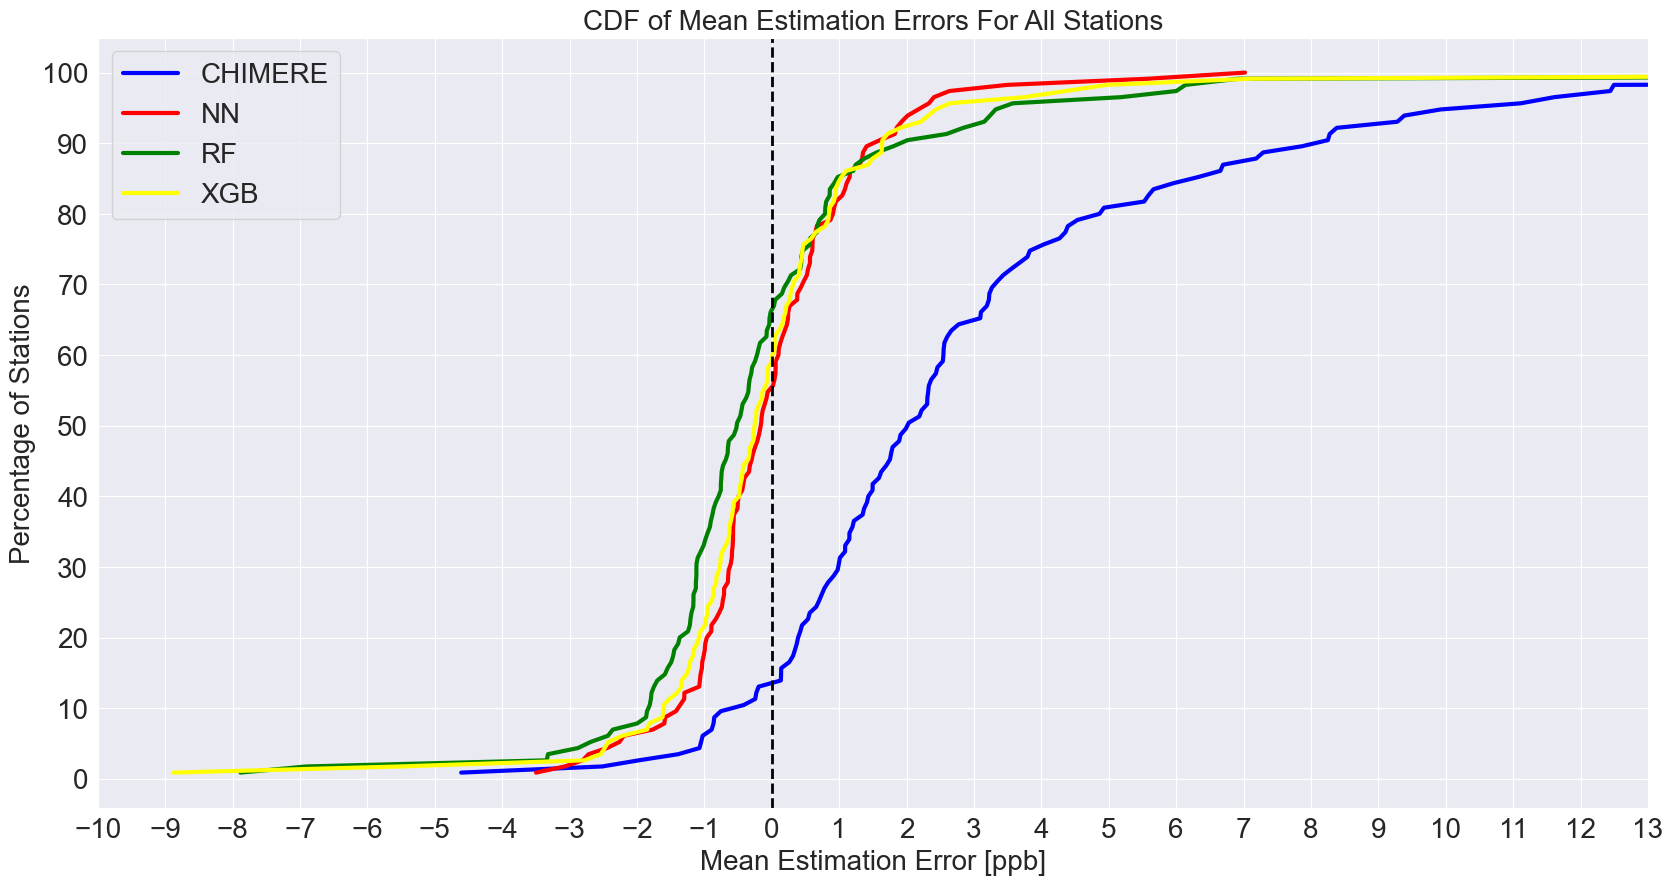

In [681]:
# before plotting a CDF, we transform the data into a cumulative distribution function.
# x-axis - mean error, y-axis - percentage of stations that have a mean error less than or equal to the mean error of a station.
# for example, if there are 115 stations, and 10 stations have a mean error less than or equal to the mean error of station A, then the percentage of stations that have a mean error less than or equal to the mean error of station A is 10/115 = 0.087
# we do this by sorting the mean errors from lowest to highest, and then for each mean error, we calculate the percentage of stations that have a mean error less than or equal to that mean error.

# for CHIMERE
fig, ax = plt.subplots(figsize=(20, 10))
mean_errors = stations_mean["Error Mean"].sort_values().values
percentages = []
for i in range(len(mean_errors)):
    percentages.append((i + 1) / len(mean_errors))
percentages = 100 * np.array(percentages)
ax.plot(mean_errors, percentages, label="CHIMERE", linewidth = 3, color = "blue")
# for NN
mean_errors = stations_mean_NN["Error Mean"].sort_values().values
percentages = []
for i in range(len(mean_errors)):
    percentages.append((i + 1) / len(mean_errors))
percentages = 100 * np.array(percentages)
ax.plot(mean_errors, percentages, label="NN", linewidth = 3, color = "red")
# for RF
mean_errors = stations_mean_RF["Error Mean"].sort_values().values
percentages = []
for i in range(len(mean_errors)):
    percentages.append((i + 1) / len(mean_errors))
percentages = 100 * np.array(percentages)
ax.plot(mean_errors, percentages, label="RF", linewidth = 3, color = "green")
# for XGB
mean_errors = stations_mean_XGB["Error Mean"].sort_values().values
percentages = []
for i in range(len(mean_errors)):
    percentages.append((i + 1) / len(mean_errors))
percentages = 100 * np.array(percentages)
ax.plot(mean_errors, percentages, label="XGB", linewidth = 3, color = "yellow")
ax.set_title("CDF of Mean Estimation Errors For All Stations", fontsize = 20)
ax.set_ylabel("Percentage of Stations", fontsize = 20)
plt.legend(fontsize=20)
if pollutant == 'NO2':
    ax.set_xlabel("Mean Estimation Error [ppb]", fontsize = 20)
    plt.xticks(np.arange(-10, 13.1, 1), fontsize=20)
    plt.xlim(-10, 13)
else:
    ax.set_xlabel("Mean Estimation Error [micro gram/m^3]", fontsize = 20)
    plt.xticks(np.arange(-24, 29.1, 2), fontsize=20)
plt.yticks(np.arange(0, 101, 10), fontsize=20)
ax.axvline(0, color="black", linestyle="--", linewidth=2) # passing a dotted vertical line through zero
plt.show()